In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

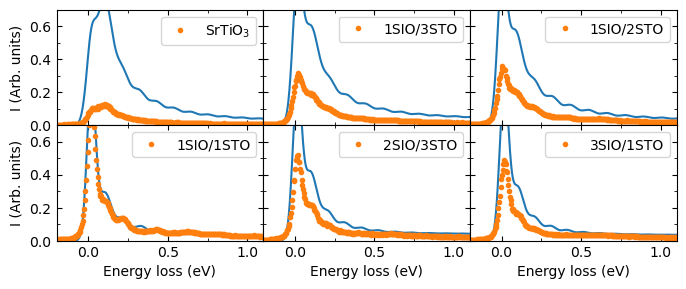

In [2]:
stems = ['STO_sub',
         'SL_STSIO_02_13_(1_3)',
         'SL_STSIO_02_11_(1_2)',
         'SL_STSIO_02_15_(1_1)',
         'SL_STSIO_02_12_(2_1)',
         'SL_STSIO_02_11_(3_1)',
         ]

labels = ['SrTiO$_3$',
          '1SIO/3STO',
          '1SIO/2STO',
          '1SIO/1STO',
          '2SIO/3STO',
          '3SIO/1STO',
         ]


fig, axs = plt.subplots(2, 3, figsize=(8, 3))

for ax, stem, label in zip(axs.ravel(), stems, labels):
    M = np.loadtxt(f'FitResult/{stem}_Adj_BGD_0.22_Fit.txt')
    ax.plot(M[1, :], M[0, :])

    M = np.loadtxt(f'SummedData/{stem}_SAC.txt')
    ax.plot(M[0, :], M[1, :], '.', label=label)

    ax.axis([-0.2, 1.1, 0, 0.7])
    ax.legend()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

fig.subplots_adjust(hspace=0, wspace=0)

for ax in axs[0, :]:
    ax.set_xticklabels([])

for ax in axs[:, 1:].ravel():
    ax.set_yticklabels([])

for ax in axs[1, :]:
    ax.set_xlabel('Energy loss (eV)')
    
for ax in axs[:, 0]:
    ax.set_ylabel('I (Arb. units)')